In [45]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt

#Data Set

In [3]:
messages=pd.read_csv('Spam dataset.csv',)

In [4]:
messages.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
messages.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


#Data Cleaning

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [9]:
messages['Message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [10]:
messages['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [11]:
df=messages['Message']

In [12]:
processed = df.str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b',
                                 'emailaddr')
processed = processed.str.replace(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)',
                                  'httpaddr')
processed = processed.str.replace(r'£|\$', 'moneysymb')    
processed = processed.str.replace(
    r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
    'phonenumbr')    
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

In [13]:
processed = processed.str.replace(r'[^\w\d\s]', ' ')
processed = processed.str.replace(r'\s+', ' ')
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [14]:
processed = processed.str.lower()

# Data Processing

In [15]:
spams=' '.join (messages['Message'])

In [16]:
nltk.regexp_tokenize(spams,r'[A-Z]\w+')

['Go',
 'Available',
 'Cine',
 'Ok',
 'Joking',
 'Free',
 'FA',
 'Cup',
 'May',
 'Text',
 'FA',
 'Nah',
 'FreeMsg',
 'Hey',
 'Tb',
 'XxX',
 'Even',
 'They',
 'As',
 'Melle',
 'Melle',
 'Oru',
 'Minnaminunginte',
 'Nurungu',
 'Vettam',
 'Callers',
 'Press',
 'Callertune',
 'WINNER',
 'As',
 'To',
 'Claim',
 'KL341',
 'Valid',
 'Had',
 'Update',
 'Free',
 'Call',
 'The',
 'Mobile',
 'Update',
 'Co',
 'FREE',
 'SIX',
 'CASH',
 'From',
 'CSH11',
 'Cost',
 'TsandCs',
 'Reply',
 'HL',
 'URGENT',
 'You',
 'FREE',
 'Prize',
 'Jackpot',
 'Txt',
 'CLAIM',
 'No',
 'LCCLTD',
 'POBOX',
 'LDNW1A7RW18',
 'You',
 'HAVE',
 'DATE',
 'ON',
 'SUNDAY',
 'WITH',
 'WILL',
 'XXXMobileMovieClub',
 'To',
 'WAP',
 'QJKGIGHJJGCBL',
 'Oh',
 'Eh',
 'Yes',
 'He',
 'Fine',
 'That',
 'England',
 'Macedonia',
 'Txt',
 'ENGLAND',
 'Try',
 'WALES',
 'SCOTLAND',
 'POBOXox36504W45WQ',
 'Is',
 'So',
 'Then',
 'Aft',
 'Ard',
 'Ffffffffff',
 'Alright',
 'Just',
 'This',
 'Mark',
 'He',
 'Lol',
 'Lol',
 'Did',
 'Are',
 'Did',


In [18]:
stop_words = nltk.corpus.stopwords.words('english')

In [21]:
filtered_tokens=[]
for token in spams.split():
  if token not in stop_words:
    word=re.sub(r'[!"#\$\%\&\'()*+,-./:;<=>?@[\\]^_`{|}~]+','',token)
    if word != '':
      filtered_tokens.append(word)

In [22]:
filtered_tokens

['Go',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'got',
 'amore',
 'wat...',
 'Ok',
 'lar...',
 'Joking',
 'wif',
 'u',
 'oni...',
 'Free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005.',
 'Text',
 'FA',
 '87121',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)T&C's",
 'apply',
 "08452810075over18's",
 'U',
 'dun',
 'say',
 'early',
 'hor...',
 'U',
 'c',
 'already',
 'say...',
 'Nah',
 'I',
 'think',
 'goes',
 'usf,',
 'lives',
 'around',
 'though',
 'FreeMsg',
 'Hey',
 'darling',
 '3',
 "week's",
 'word',
 'back!',
 "I'd",
 'like',
 'fun',
 'still?',
 'Tb',
 'ok!',
 'XxX',
 'std',
 'chgs',
 'send,',
 '£1.50',
 'rcv',
 'Even',
 'brother',
 'like',
 'speak',
 'me.',
 'They',
 'treat',
 'like',
 'aids',
 'patent.',
 'As',
 'per',
 'request',
 "'Melle",
 'Melle',
 '(Oru',
 'Minnaminunginte',
 'Nurungu',
 "Vettam)'",
 'set',
 'callertune',
 'Callers.

In [24]:
processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in set(stop_words))
)

# Stemming

In [25]:
porter = nltk.PorterStemmer()
processed = processed.apply(lambda x: ' '.join(
    porter.stem(term) for term in x.split())
)

In [26]:
def preprocess_text(messy_string):
    assert(type(messy_string) == str)
    cleaned = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', messy_string)
    cleaned = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr',
                     cleaned)
    cleaned = re.sub(r'£|\$', 'moneysymb', cleaned)
    cleaned = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
        'phonenumbr', cleaned)
    cleaned = re.sub(r'\d+(\.\d+)?', 'numbr', cleaned)
    cleaned = re.sub(r'[^\w\d\s]', ' ', cleaned)
    cleaned = re.sub(r'\s+', ' ', cleaned)
    cleaned = re.sub(r'^\s+|\s+?$', '', cleaned.lower())
    return ' '.join(
        porter.stem(term) 
        for term in cleaned.split()
        if term not in set(stop_words)
    )

In [27]:
(processed == df.apply(preprocess_text)).all()

True

In [28]:
print(processed)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri numbr wkli comp win fa cup final tk...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    numbrnd time tri numbr contact u u moneysymbnu...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object


In [29]:
print(df)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


# N-Gram

In [31]:
from collections import defaultdict

In [32]:
#get the count of every word in both the columns of ham and spam
hamValues=defaultdict(int)
spamValues=defaultdict(int)

In [33]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

# Unigram

In [34]:
#get the count of every word in both the columns of dataSet dataframes where Category="ham"
for text in messages[messages.Category=='ham'].Message:
  for word in generate_N_grams(text):
    hamValues[word]+=1

Sentence after removing stopwords: ['Go', 'jurong', 'point,', 'crazy..', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'got', 'amore', 'wat...']
Sentence after removing stopwords: ['Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...']
Sentence after removing stopwords: ['U', 'dun', 'say', 'early', 'hor...', 'U', 'c', 'already', 'say...']
Sentence after removing stopwords: ['Nah', 'I', 'think', 'goes', 'usf,', 'lives', 'around', 'though']
Sentence after removing stopwords: ['Even', 'brother', 'like', 'speak', 'me.', 'They', 'treat', 'like', 'aids', 'patent.']
Sentence after removing stopwords: ['As', 'per', 'request', "'Melle", 'Melle', '(Oru', 'Minnaminunginte', 'Nurungu', "Vettam)'", 'set', 'callertune', 'Callers.', 'Press', '*9', 'copy', 'friends', 'Callertune']
Sentence after removing stopwords: ["I'm", 'gonna', 'home', 'soon', 'want', 'talk', 'stuff', 'anymore', 'tonight,', 'k?', "I've", 'cried', 'enough', 'today.']
Sentence after removing stopwords: ["I've

In [35]:
#get the count of every word in both the columns of dataSet dataframes where Category="Spam"
for text in messages[messages.Category=='spam'].Message:
  for word in generate_N_grams(text):
    spamValues[word]+=1

Sentence after removing stopwords: ['Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005.', 'Text', 'FA', '87121', 'receive', 'entry', 'question(std', 'txt', "rate)T&C's", 'apply', "08452810075over18's"]
Sentence after removing stopwords: ['FreeMsg', 'Hey', 'darling', '3', "week's", 'word', 'back!', "I'd", 'like', 'fun', 'still?', 'Tb', 'ok!', 'XxX', 'std', 'chgs', 'send,', '£1.50', 'rcv']
Sentence after removing stopwords: ['WINNER!!', 'As', 'valued', 'network', 'customer', 'selected', 'receivea', '£900', 'prize', 'reward!', 'To', 'claim', 'call', '09061701461.', 'Claim', 'code', 'KL341.', 'Valid', '12', 'hours', 'only.']
Sentence after removing stopwords: ['Had', 'mobile', '11', 'months', 'more?', 'U', 'R', 'entitled', 'Update', 'latest', 'colour', 'mobiles', 'camera', 'Free!', 'Call', 'The', 'Mobile', 'Update', 'Co', 'FREE', '08002986030']
Sentence after removing stopwords: ['SIX', 'chances', 'win', 'CASH!', 'From', '100', '20,000', 'pounds

In [40]:
spamValues['charity']

5

In [43]:
#sort in DO wrt 2nd column in each of hamValues,spamValues
df_Ham=pd.DataFrame(sorted(hamValues.items(),key=lambda x:x[1],reverse=True))
df_Spam=pd.DataFrame(sorted(spamValues.items(),key=lambda x:x[1],reverse=True))

pd1=df_Ham[0][:10]
pd2=df_Ham[1][:10]

ned1=df_Spam[0][:10]
ned2=df_Spam[1][:10]

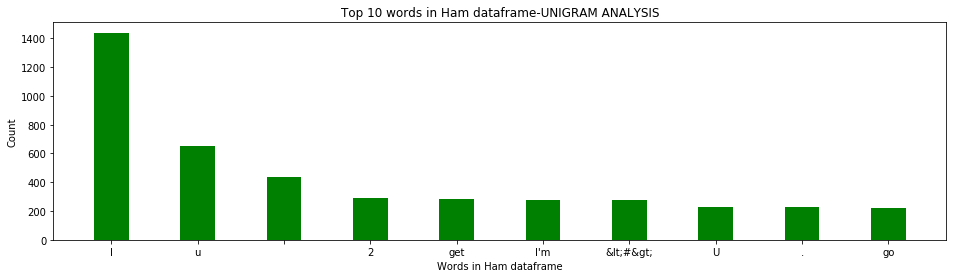

In [46]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in Ham dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Ham dataframe-UNIGRAM ANALYSIS")
plt.savefig("Ham-unigram.png")
plt.show()

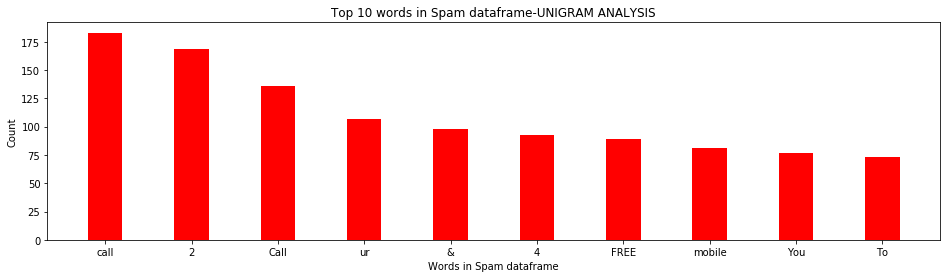

In [59]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in Spam dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Spam dataframe-UNIGRAM ANALYSIS")
plt.savefig("Spam-unigram.png")
plt.show()

# Bigram

In [47]:
#get the count of every word in both the columns of dataSet dataframes where Category="ham"
hamValues2=defaultdict(int)
spamValues2=defaultdict(int)

In [48]:
#get the count of every word in both the columns of dataSet dataframes where Category="ham"
for text in messages[messages.Category=='ham'].Message:
  for word in generate_N_grams(text,2):
    hamValues2[word]+=1

Sentence after removing stopwords: ['Go', 'jurong', 'point,', 'crazy..', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'got', 'amore', 'wat...']
Sentence after removing stopwords: ['Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...']
Sentence after removing stopwords: ['U', 'dun', 'say', 'early', 'hor...', 'U', 'c', 'already', 'say...']
Sentence after removing stopwords: ['Nah', 'I', 'think', 'goes', 'usf,', 'lives', 'around', 'though']
Sentence after removing stopwords: ['Even', 'brother', 'like', 'speak', 'me.', 'They', 'treat', 'like', 'aids', 'patent.']
Sentence after removing stopwords: ['As', 'per', 'request', "'Melle", 'Melle', '(Oru', 'Minnaminunginte', 'Nurungu', "Vettam)'", 'set', 'callertune', 'Callers.', 'Press', '*9', 'copy', 'friends', 'Callertune']
Sentence after removing stopwords: ["I'm", 'gonna', 'home', 'soon', 'want', 'talk', 'stuff', 'anymore', 'tonight,', 'k?', "I've", 'cried', 'enough', 'today.']
Sentence after removing stopwords: ["I've

In [49]:
#get the count of every word in both the columns of dataSet dataframes where Category="Spam"
for text in messages[messages.Category=='spam'].Message:
  for word in generate_N_grams(text,2):
    spamValues2[word]+=1

Sentence after removing stopwords: ['Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005.', 'Text', 'FA', '87121', 'receive', 'entry', 'question(std', 'txt', "rate)T&C's", 'apply', "08452810075over18's"]
Sentence after removing stopwords: ['FreeMsg', 'Hey', 'darling', '3', "week's", 'word', 'back!', "I'd", 'like', 'fun', 'still?', 'Tb', 'ok!', 'XxX', 'std', 'chgs', 'send,', '£1.50', 'rcv']
Sentence after removing stopwords: ['WINNER!!', 'As', 'valued', 'network', 'customer', 'selected', 'receivea', '£900', 'prize', 'reward!', 'To', 'claim', 'call', '09061701461.', 'Claim', 'code', 'KL341.', 'Valid', '12', 'hours', 'only.']
Sentence after removing stopwords: ['Had', 'mobile', '11', 'months', 'more?', 'U', 'R', 'entitled', 'Update', 'latest', 'colour', 'mobiles', 'camera', 'Free!', 'Call', 'The', 'Mobile', 'Update', 'Co', 'FREE', '08002986030']
Sentence after removing stopwords: ['SIX', 'chances', 'win', 'CASH!', 'From', '100', '20,000', 'pounds

In [50]:
#sort in DO wrt 2nd column in each of hamValues,spamValues
df_Ham2=pd.DataFrame(sorted(hamValues2.items(),key=lambda x:x[1],reverse=True))
df_Spam2=pd.DataFrame(sorted(spamValues2.items(),key=lambda x:x[1],reverse=True))

pd1BI=df_Ham2[0][:10]
pd2BI=df_Ham2[1][:10]

ned1BI=df_Spam2[0][:10]
ned2BI=df_Spam2[1][:10]

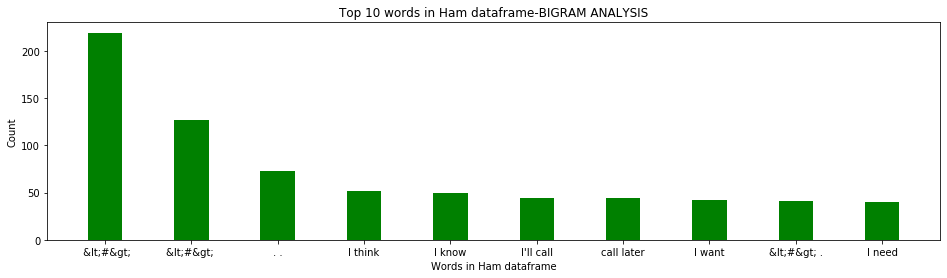

In [51]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1BI,pd2BI, color ='green',
        width = 0.4)
plt.xlabel("Words in Ham dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Ham dataframe-BIGRAM ANALYSIS")
plt.savefig("Ham-Bigram.png")
plt.show()

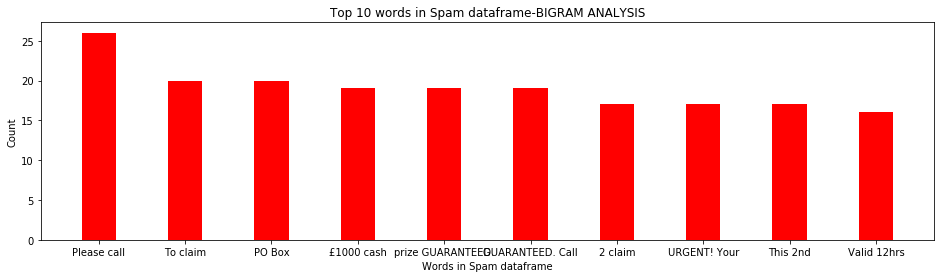

In [58]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1BI,ned2BI, color ='red',
        width = 0.4)
plt.xlabel("Words in Spam dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Spam dataframe-BIGRAM ANALYSIS")
plt.savefig("Spam-Bigram.png")
plt.show()

# Trigram

In [52]:
#get the count of every word in both the columns of dataSet dataframes where Category="ham"
hamValues3=defaultdict(int)
spamValues3=defaultdict(int)

In [53]:
#get the count of every word in both the columns of dataSet dataframes where Category="ham"
for text in messages[messages.Category=='ham'].Message:
  for word in generate_N_grams(text,3):
    hamValues3[word]+=1

Sentence after removing stopwords: ['Go', 'jurong', 'point,', 'crazy..', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'got', 'amore', 'wat...']
Sentence after removing stopwords: ['Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...']
Sentence after removing stopwords: ['U', 'dun', 'say', 'early', 'hor...', 'U', 'c', 'already', 'say...']
Sentence after removing stopwords: ['Nah', 'I', 'think', 'goes', 'usf,', 'lives', 'around', 'though']
Sentence after removing stopwords: ['Even', 'brother', 'like', 'speak', 'me.', 'They', 'treat', 'like', 'aids', 'patent.']
Sentence after removing stopwords: ['As', 'per', 'request', "'Melle", 'Melle', '(Oru', 'Minnaminunginte', 'Nurungu', "Vettam)'", 'set', 'callertune', 'Callers.', 'Press', '*9', 'copy', 'friends', 'Callertune']
Sentence after removing stopwords: ["I'm", 'gonna', 'home', 'soon', 'want', 'talk', 'stuff', 'anymore', 'tonight,', 'k?', "I've", 'cried', 'enough', 'today.']
Sentence after removing stopwords: ["I've

In [54]:
#get the count of every word in both the columns of dataSet dataframes where Category="Spam"
for text in messages[messages.Category=='spam'].Message:
  for word in generate_N_grams(text,3):
    spamValues3[word]+=1

Sentence after removing stopwords: ['Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005.', 'Text', 'FA', '87121', 'receive', 'entry', 'question(std', 'txt', "rate)T&C's", 'apply', "08452810075over18's"]
Sentence after removing stopwords: ['FreeMsg', 'Hey', 'darling', '3', "week's", 'word', 'back!', "I'd", 'like', 'fun', 'still?', 'Tb', 'ok!', 'XxX', 'std', 'chgs', 'send,', '£1.50', 'rcv']
Sentence after removing stopwords: ['WINNER!!', 'As', 'valued', 'network', 'customer', 'selected', 'receivea', '£900', 'prize', 'reward!', 'To', 'claim', 'call', '09061701461.', 'Claim', 'code', 'KL341.', 'Valid', '12', 'hours', 'only.']
Sentence after removing stopwords: ['Had', 'mobile', '11', 'months', 'more?', 'U', 'R', 'entitled', 'Update', 'latest', 'colour', 'mobiles', 'camera', 'Free!', 'Call', 'The', 'Mobile', 'Update', 'Co', 'FREE', '08002986030']
Sentence after removing stopwords: ['SIX', 'chances', 'win', 'CASH!', 'From', '100', '20,000', 'pounds

In [55]:
#sort in DO wrt 2nd column in each of hamValues,spamValues
df_Ham3=pd.DataFrame(sorted(hamValues3.items(),key=lambda x:x[1],reverse=True))
df_Spam3=pd.DataFrame(sorted(spamValues3.items(),key=lambda x:x[1],reverse=True))

pd1TRI=df_Ham3[0][:10]
pd2TRI=df_Ham3[1][:10]

ned1TRI=df_Spam3[0][:10]
ned2TRI=df_Spam3[1][:10]

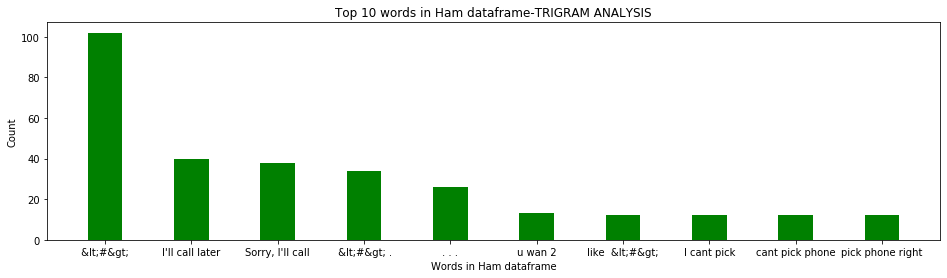

In [56]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1TRI,pd2TRI, color ='green',
        width = 0.4)
plt.xlabel("Words in Ham dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Ham dataframe-TRIGRAM ANALYSIS")
plt.savefig("Ham-Trigram.png")
plt.show()

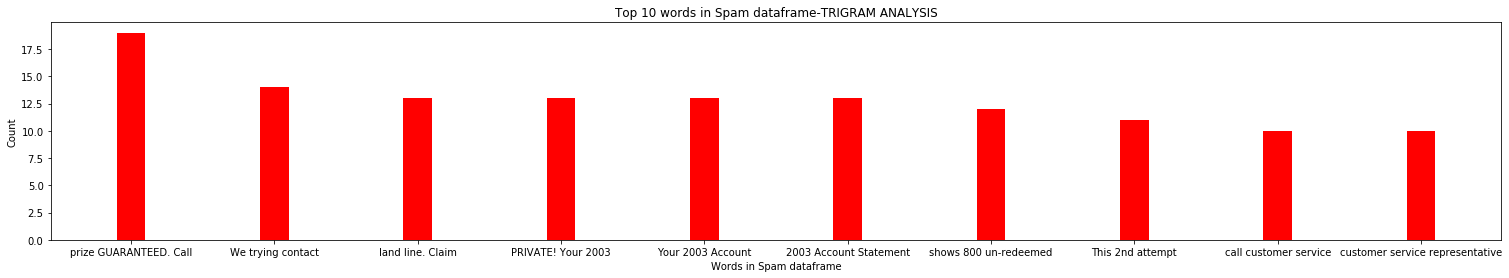

In [57]:
plt.figure(1,figsize=(26,4))
plt.bar(ned1TRI,ned2TRI, color ='red',
        width = 0.2)
plt.xlabel("Words in Spam dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Spam dataframe-TRIGRAM ANALYSIS")
plt.savefig("Spam-Trigram.png")
plt.show()

# Feature extraction

In [60]:
vocab=sorted(set(word for sentence in processed for word in sentence.split()))

In [61]:
vocab

['_',
 '____',
 'aa',
 'aah',
 'aaniy',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'abil',
 'abiola',
 'abj',
 'abl',
 'abnorm',
 'abouta',
 'abroad',
 'absenc',
 'absolut',
 'absolutli',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abus',
 'ac',
 'academ',
 'acc',
 'accent',
 'accentur',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accommodationvouch',
 'accomod',
 'accordin',
 'accordingli',
 'account',
 'accumul',
 'ach',
 'achan',
 'achiev',
 'acid',
 'acknowledg',
 'aclnumbrpm',
 'acnt',
 'aco',
 'across',
 'act',
 'actin',
 'action',
 'activ',
 'activnumbr',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addi',
 'addict',
 'address',
 'adewal',
 'adi',
 'adjust',
 'admin',
 'administr',
 'admir',
 'admiss',
 'admit',
 'ador',
 'adp',
 'adress',
 'adrian',
 'adrink',
 'adsens',
 'adult',
 'advanc',
 'adventur',
 'advic',
 'advis',
 'advisor',
 'aeronaut',
 'aeroplan',
 'afew',
 'affair',
 'affect',
 'affe

* Binary

In [79]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [64]:
vec=CountVectorizer(binary=True)

In [87]:
vec.fit(processed)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [71]:
vocabulary=sorted (vec.vocabulary_.keys())
[w for w in vocabulary]

['____',
 'aa',
 'aah',
 'aaniy',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'abil',
 'abiola',
 'abj',
 'abl',
 'abnorm',
 'abouta',
 'abroad',
 'absenc',
 'absolut',
 'absolutli',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abus',
 'ac',
 'academ',
 'acc',
 'accent',
 'accentur',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accommodationvouch',
 'accomod',
 'accordin',
 'accordingli',
 'account',
 'accumul',
 'ach',
 'achan',
 'achiev',
 'acid',
 'acknowledg',
 'aclnumbrpm',
 'acnt',
 'aco',
 'across',
 'act',
 'actin',
 'action',
 'activ',
 'activnumbr',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addi',
 'addict',
 'address',
 'adewal',
 'adi',
 'adjust',
 'admin',
 'administr',
 'admir',
 'admiss',
 'admit',
 'ador',
 'adp',
 'adress',
 'adrian',
 'adrink',
 'adsens',
 'adult',
 'advanc',
 'adventur',
 'advic',
 'advis',
 'advisor',
 'aeronaut',
 'aeroplan',
 'afew',
 'affair',
 'affect',
 'affection'

In [88]:
features=vec.transform(processed)
pd.DataFrame(vec.transform(processed).toarray(),columns=vocabulary)

,____,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,...,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,èn,únumbr,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Counting

In [78]:
vec2=CountVectorizer(binary=False)
vec2.fit(processed)
vocabulary2=sorted (vec.vocabulary_.keys())
pd.DataFrame(vec2.transform(processed).toarray(),columns=vocabulary2)

,____,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,...,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,èn,únumbr,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
features2=vec2.transform(processed)

* TF - IDF

In [80]:
vec3=TfidfVectorizer()
vec3.fit(processed)
vocabulary3=sorted (vec3.vocabulary_.keys())
pd.DataFrame(vec3.transform(processed).toarray(),columns=vocabulary3)

,____,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,...,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,èn,únumbr,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
features3=vec3.transform(processed)

# Model Using CountVectorizer Binary

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test=train_test_split(features,messages['Category'],test_size=0.2)

In [108]:
print(x_train.shape)
print(x_test.shape)

(4457, 6424)
(1115, 6424)


In [109]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [110]:
predicted=model.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,predicted)

0.9802690582959641

In [112]:
confusion_matrix(y_test,predicted)

array([[952,  16],
       [  6, 141]], dtype=int64)

# Model Using CountVectorizer Counting

In [104]:
x_train2,x_test2,y_train2,y_test2=train_test_split(features2,messages['Category'],test_size=0.2)

In [113]:
from sklearn.naive_bayes import MultinomialNB
model2=MultinomialNB()
model2.fit(x_train2,y_train2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [114]:
predicted2=model2.predict(x_test2)

In [115]:
accuracy_score(y_test2,predicted2)

0.9775784753363229

In [116]:
confusion_matrix(y_test2,predicted2)

array([[962,  14],
       [ 11, 128]], dtype=int64)

# Model Using TF-DIF

In [117]:
x_train3,x_test3,y_train3,y_test3=train_test_split(features3,messages['Category'],test_size=0.2)

In [118]:
model3=MultinomialNB()
model3.fit(x_train3,y_train3)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [119]:
predicted3=model3.predict(x_test3)

In [120]:
accuracy_score(y_test3,predicted3)

0.9730941704035875

In [121]:
confusion_matrix(y_test3,predicted3)

array([[965,   0],
       [ 30, 120]], dtype=int64)